### About the dataset

This dataset is a collection of information related to customers and their credit card usage. It contains various features that provide insights into customer behavior, preferences, and credit card usage patterns.

Objectives:-

1. To perform data cleaning, preprocessing, visualizing and feature engineering on the dataset.

2. To implement hierarchical clustering, K-means clustering and BDSCAN models.

### Feature Description

1. Sl_No : Column represents the serial number or index assigned to each record in the dataset.
2. Customer Key : Column contains a unique identifier assigned to each customer in the dataset.
3. Avg_Credit_Limit : Column represents the average credit limit assigned to each customer, It indicates the average amount of credit that the customer is allowed to borrow or spend using their credit card.
4. Total_Credit_Cards : Column denotes the total number of credit cards held by each customer.
5. Total_visits_bank : Column represents the total number of visits made by each customer to a physical bank branch.
6. Total_visits_online : Column denotes the total number of visits made by each customer to the online banking platform or website.
7. Total_calls_made : column represents the total number of calls made by each customer to the customer service or support center of the credit card company.

## Read the dataset

In [6]:
import pandas as pd

path = '../datasets/Credit_card_customer_data.csv'
dataset = pd.read_csv(path)
dataset.shape

(660, 7)

In [7]:
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [8]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
dataset.duplicated().any()

False

## Insert new features

In [10]:
# Create a new column called "Credit_Utilization_Ratio" assigns the calculated credit utilization ratio for each customer.
dataset['Credit_Utilization_Ratio'] = dataset['Avg_Credit_Limit'] / dataset['Total_Credit_Cards']

In [12]:
# Create a new column called "Interaction_Score" can help identify customers who are more actively engaged with the bank's services.
dataset['Interaction_Score'] = dataset['Total_visits_bank'] + dataset['Total_visits_online'] + dataset['Total_calls_made']

In [13]:
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
0,1,87073,100000,2,1,1,0,50000.000000,2
1,2,38414,50000,3,0,10,9,16666.666667,19
2,3,17341,50000,7,1,3,4,7142.857143,8
3,4,40496,30000,5,1,1,4,6000.000000,6
4,5,47437,100000,6,0,12,3,16666.666667,15


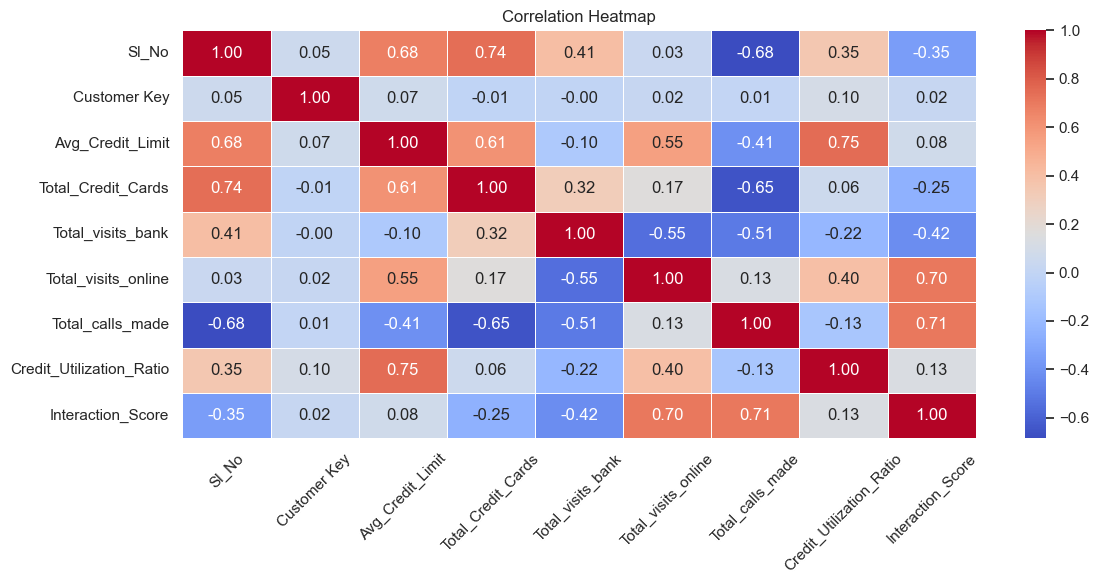

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set_color_codes('colorblind')

Corr = dataset.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

From the previous 'Correlation Matrix' important features that correlated with 'Avg Credit Limit' column are 'Credit Utilization Ratio' 0.67 and 'Total Credit card' 0.62 , so let's choose one of them to apply Clustering methods